# Jurnal Modul 7 : Morfologi Citra
### 1. Lakukanlah proses morfologi citra pada gambar tersebut (erosi, dilasi, opening, dan closing) dengan kernel berukuran 5 x 5 (semua nilai di dalamnya adalah 1)!


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Block code diatas merupakan pemanggilan library yang akan digunakan untuk melakukan pengolahan citra

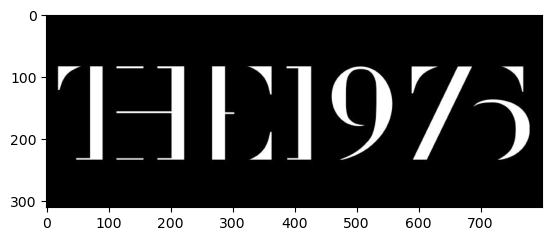

In [4]:
img = plt.imread("1975.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap = "gray")

Code di atas berfungsi untuk membaca gambar "1975.jpg" menggunakan plt.imread, kemudian mengubahnya menjadi citra keabuan (grayscale) menggunakan cv2.cvtColor dengan mode konversi cv2.COLOR_BGR2GRAY. Citra keabuan kemudian ditampilkan menggunakan plt.imshow dengan colormap "gray".

In [5]:
def toBiner(image):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if((image[i, j]>128).any()):
                result[i, j] = 255
            elif ((image[i, j]<=128).any()):
                result[i,j] = 0
    return result

Code diatas merupakan fungsi untuk mengkonversi citra menjadi citra biner dengan nilai 0 dan 255, proses konversi dilakukan dengan cara melooping citra dan merubah semua piksel citra yang lebih besar dari 128 menjadi 255 dan yang lebih kecil dari 128 menjadi 0.

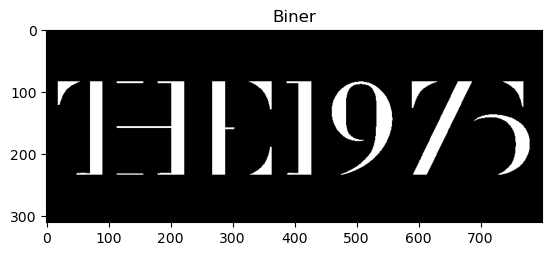

In [6]:
imgBiner = toBiner(grayImg)
plt.title("Biner")
plt.imshow(imgBiner, cmap='gray')

Code diatas merupkan pemanggilan fungsi konversi citra yaitu toBiner dengan variabel imgBiner yang akan menampung hasil dari konversi citra kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".

# a. Dilasi

In [7]:
kernel = np.ones((5,5))

Code diatas merupakan pembuatan kernel 5x5 yang semua nilainya adalah 1.

In [8]:
def Dilasi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    for i in range((image.shape[0] - kernel.shape[0])):
        for j in range((image.shape[1] - kernel.shape[1])):
            if((image[i,j] == 255)).any():
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        if(kernel[k,l] == 1):
                            result[(i+k),(j+l)] = 255
    return result

Code diatas merupakan fungsi yang digunakan untuk melakukan proses dilasi pada citra dengan parameter image dan kernel, proses dilakukan dengan melakukan looping pada citra dan memeriksa jika posisi kernel yang bernilai 1 tepat berada pada indeks citra yang bernilai 255, maka hasil dilasi akan akan bernilai 255, hasil dari proses dilasi akan disimpan dalam varibel result.

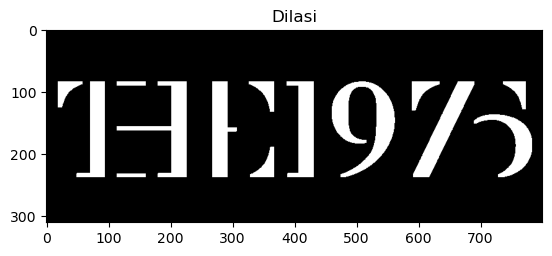

In [9]:
dilasiImg = Dilasi(imgBiner, kernel)
plt.title("Dilasi")
plt.imshow(dilasiImg, cmap = "gray")

Code diatas merupkan pemanggilan fungsi dilasi citra yaitu Dilasi dengan variabel dilasiImg yang akan menampung hasil dari proses dilasi pada citra kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".

# b. Erosi

In [10]:
def Erosi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0] - kernel.shape[0]):
        for j in range(image.shape[1] - kernel.shape[1]):
            if((image[i, j] == 0).any()):
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        if(kernel[k, l] == 1):
                            result[i+k,j+l] = 0 
            result[i+k,j+l] = 255
    return result

Code diatas merupakan fungsi yang digunakan untuk melakukan proses erosi pada citra dengan parameter image dan kernel, proses dilakukan dengan melakukan looping pada citra dan memeriksa apakah terdapat nilai 0 pada indeks citra di posisi kernel, jika terdapat nilai 0 pada indeks citra di posisi kernel maka hasil erosi adalah 0 jika tidak terdapat nilai 0 pada indeks citra di posisi kernel maka hasil erosi adalah 255, hasil dari proses erosi akan disimpan dalam variabel result.

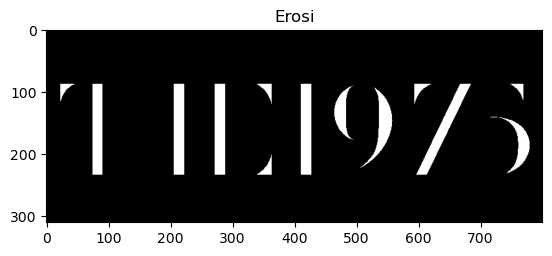

In [11]:
erosiImg = Erosi(imgBiner, kernel)
plt.title("Erosi")
plt.imshow(erosiImg, cmap = "gray")

Code diatas merupkan pemanggilan fungsi erosi citra yaitu Erosi dengan variabel erosiImg yang akan menampung hasil dari proses erosi pada citra kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".

# c. Opening

In [12]:
def Opening(image, kernel):
    result = np.zeros(image.shape).astype(int)
    erosiImg = Erosi(image, kernel)
    result = Dilasi(erosiImg, kernel)
    return result

Code diatas merupakan fungsi opeing yang digunakan untuk melakukan proses opening pada citra dengan parameter image dan kernel, proses dilakukan dengan melakukan proses erosi pada citra kemudian melakukan proses dilasi citra pada hasil erosi citra tersebut, hasil dari proses opening disimpan dalam variabel result.

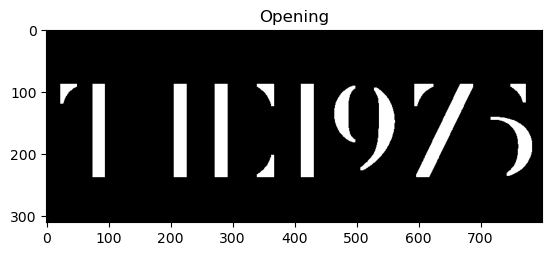

In [13]:
openingImg = Opening(imgBiner, kernel)
plt.title("Opening")
plt.imshow(openingImg, cmap = "gray")


Code diatas merupkan pemanggilan fungsi opening citra yaitu Opening dengan variabel openingImg yang akan menampung hasil dari proses opening pada citra kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".

# d. Closing

In [14]:
def Closing(image, kernel):
    result = np.zeros(image.shape).astype(int)
    dilasiImg = Dilasi(image, kernel)
    result = Erosi(dilasiImg, kernel)
    return result

Code diatas merupkan fungsi yang digunakan untuk melakukan proses closing pada citra dengan parameter image dan kernel, proses closing dilakukan dengan melakukan proses dilasi pada citra kemudian melakukan proses erosi citra pada hasil dilasi citra tersebut, hasil dari proses closing disimpan dalam variabel result.

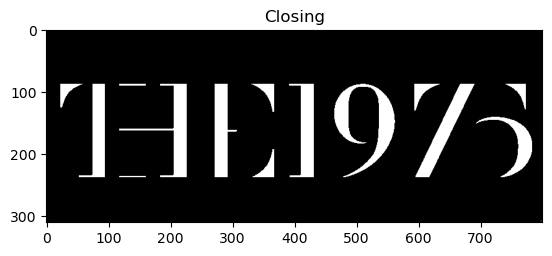

In [15]:
closingImg = Closing(imgBiner, kernel)
plt.title("Closing")
plt.imshow(closingImg, cmap = "gray")

Code diatas merupkan pemanggilan fungsi closing citra yaitu Closing dengan variabel closingImg yang akan menampung hasil dari proses closing pada citra kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".

# e. Gradient Morfologi

In [16]:
def Gradient(image, kernel):
    result = np.zeros(img.shape)
    dilasiImg = Dilasi(image, kernel)
    erosiImg = Erosi(image, kernel)
    result = dilasiImg - erosiImg
    return result

Code ditas merupakan fungsi yang digunakan untuk melakukan gradient morfologi dengan parameter image dan kernel, proses dilakukan dengan melakukan proses dilasi pada citra kemudian melakukan proses erosi pada citra kemudian proses terakhir yaitu mengurangi hasil dari proses dilasi dengan hasil dari proses erori lalu hasilnya akan disimpan dalam variabel result.

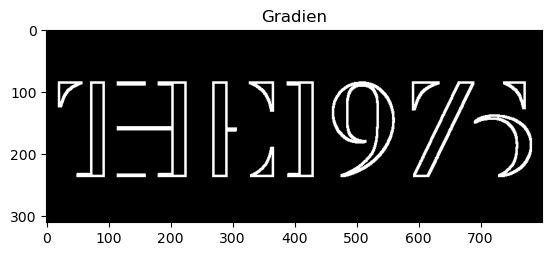

In [17]:
gradientImg = Gradient(imgBiner,kernel)
final = toBiner(gradientImg)
plt.title("Gradien")
plt.imshow(final, cmap="gray")

Code diatas merupkan pemanggilan fungsi gradient morfologi citra yaitu Gradient dengan variabel gradientImg yang akan menampung hasil dari gradient morfologi citra kemudian dilakukan proses treshold pada citra hasil gradient morfologi yang di simpan dalam variabel final kemudian citra akan ditampilkan menggunakan plt.imshow dengan cmap "gray".